# Regresión lineal simple y regresión lineal múltiple

**Regresión lineal simple**

Algoritmo de aprendizaje supervisado que nos indica la tendencia de un conjunto de datos continuos, modelando la relación entre una variable dependiente $Y$ y una explicativa llamada $X$.

La fórmula que representa la tendencia lineal es:
$$ y = mx_i + b$$

**Regresión lineal múltiple**

Cuando nosotros tenemos diferentes variables cuantitativas se requiere de otro algoritmo llamado regresión lineal múltiple. Es decir, si nuestro problema tiene más de dos variables se le considera lineal múltiple.

En otras palabras, nos permite encontrar la relación de $X-Y$ pero considerando más datos.

_____________________________

## Regresión lineal simple

Empecemos con un ejemplo de **regresión lineal simple** con Scikit-Learn. Para eso, vamos a usar un dataset de salarios con relación a los años de experiencia.

### Librerías

In [51]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import fundamentos_ML.utils.paths as path
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Leyendo los datos

In [4]:
input_data = path.data_raw_dir('salarios.csv')
dataset = pd.read_csv(input_data)
dataset.head(5)

,Aexperiencia,Salario
0,10.0,42500
1,8.0,36302
2,5.4,35000
3,2.5,18103
4,1.0,15000


In [5]:
dataset.shape

(30, 2)

### División de datos

Nuestro dataset se va a dividir en dos conjuntos: de entretamiento y de prueba. Es preferible que el 80 % del dataset sea destinado al entrenamiento, y el restante 20 % al set de pruebas.

In [6]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [15]:
X_train

array([[10. ],
       [ 7. ],
       [ 2. ],
       [ 5.3],
       [ 8. ],
       [ 3. ],
       [ 2. ],
       [ 2. ],
       [ 2.1],
       [ 5. ],
       [ 8. ],
       [ 1. ],
       [ 4. ],
       [ 1. ],
       [ 3. ],
       [ 2. ],
       [10. ],
       [ 6. ],
       [10. ],
       [ 2.5],
       [10. ],
       [ 3.4],
       [ 5. ],
       [ 3. ]])

### Creación del modelo lineal simple

In [16]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred = regressor.predict(X_train)

### Visualización de los resultados

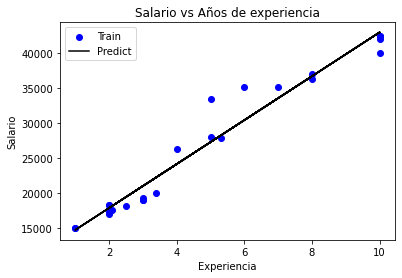

In [55]:
import fundamentos_ML.visualization.visualize as visualize
visualize.linear_reg_simple_plot(X_train, y_train, X_train, y_pred, 'blue', 'Train')

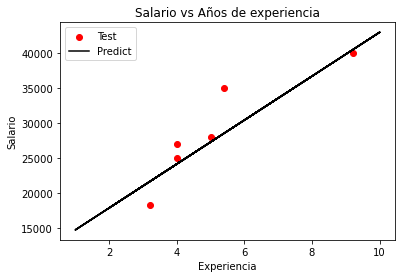

In [54]:
visualize.linear_reg_simple_plot(X_test, y_test, X_train, y_pred, 'red', 'Test')

### Evaluando el modelo

In [34]:
import sklearn.metrics as metrics

mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print(f"""r2: {r2.round(4)}
mse: {mse.round(4)}
""")

r2: 0.7862
mse: 10417352.0775



Como vemos, nuestro coeficiente de determinación (R^2) es no muy cercano a 1, por lo que tenemos un ajuste no muy bueno. Para mejorarlo, es necesario conseguir más datos o realizar una regresión lineal múltiple donde se empleen otros descriptores que puedan ayudar al ajuste.

___________________________________________________________________

## Regresión lineal múltiple

Se va a tratar el mismo ejemplo anterior, pero ahora se le agregará una tercera columna del país al dataset. Ahora, debido a que el descriptor es una variable categórica, es necesario realizar una conversión que me lo convierta a un valor numérico y poder modelar con una regresión lineal múltiple.